In [76]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
#Get stock information from Oct 2006 to Dec 2011
df = pd.read_csv('data/aapl_ohlc.csv', index_col='Date', parse_dates=True)

In [78]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,75.100003,75.870001,74.299998,74.859998,178159800,9.903863
2006-10-03,74.450002,74.950000,73.190000,74.080000,197677200,9.800671
2006-10-04,74.100000,75.459998,73.159999,75.380003,207270700,9.972659
2006-10-05,74.529997,76.160001,74.130001,74.829997,170970800,9.899894
2006-10-06,74.420001,75.040002,73.810000,74.220003,116739700,9.819193


In [79]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-12-23,399.690002,403.590012,399.489998,403.330006,67349800,53.359942
2011-12-27,403.099987,409.090004,403.020012,406.529999,66269000,53.783297
2011-12-28,406.890007,408.250011,401.340000,402.640003,57165500,53.268656
2011-12-29,403.399994,405.650005,400.509995,405.120007,53994500,53.596757
2011-12-30,403.510010,406.280006,403.490009,405.000004,44915500,53.580881


In [80]:
close_px = df['Adj Close']

In [81]:
mavg = pd.rolling_mean(close_px, 40)

In [82]:
close_px.pct_change().head()

Date
2006-10-02         NaN
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007296
2006-10-06   -0.008152
Name: Adj Close, dtype: float64

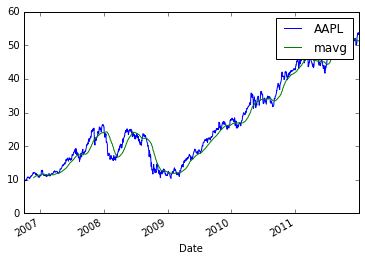

In [83]:
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [84]:
df = pd.read_csv('data/RetVsRisk.csv', index_col='Date', parse_dates=True)
df.head()

,AAPL,GE,GOOGL,IBM,KO,MSFT,PEP
Date,,,,,,,
2010-01-04,28.313195,12.657489,313.688694,115.385996,23.874306,26.227603,51.317187
2010-01-05,28.362145,12.723029,312.307316,113.992138,23.585503,26.236076,51.937282
2010-01-06,27.911008,12.657489,304.434452,113.251641,23.577133,26.075067,51.417742
2010-01-07,27.859412,13.312893,297.347355,112.859619,23.518534,25.803894,51.090935
2010-01-08,28.044630,13.599632,301.311314,113.992138,23.083239,25.981851,50.923341


In [85]:
rets = df.pct_change()
rets.head()

,AAPL,GE,GOOGL,IBM,KO,MSFT,PEP
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,-0.012097,0.000323,0.012084
2010-01-06,-0.015906,-0.005151,-0.025209,-0.006496,-0.000355,-0.006137,-0.010003
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.002485,-0.010400,-0.006356
2010-01-08,0.006648,0.021538,0.013331,0.010035,-0.018509,0.006897,-0.003280


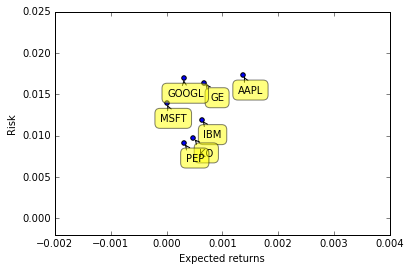

In [86]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.xlim([-.002, 0.004])
plt.ylim([-.002, 0.025])
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

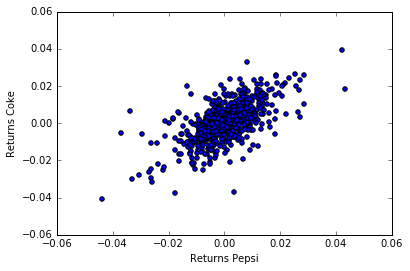

In [87]:
plt.scatter(rets.PEP, rets.KO)
plt.xlabel('Returns Pepsi')
plt.ylabel('Returns Coke')

In [88]:
corr = rets.corr()
corr

,AAPL,GE,GOOGL,IBM,KO,MSFT,PEP
AAPL,1.000000,0.457052,0.533387,0.501587,0.388007,0.472767,0.308964
GE,0.457052,1.000000,0.462696,0.609330,0.593856,0.600065,0.533503
GOOGL,0.533387,0.462696,1.000000,0.470778,0.404099,0.472851,0.329938
IBM,0.501587,0.609330,0.470778,1.000000,0.601483,0.646124,0.491088
KO,0.388007,0.593856,0.404099,0.601483,1.000000,0.523479,0.635843
MSFT,0.472767,0.600065,0.472851,0.646124,0.523479,1.000000,0.477424
PEP,0.308964,0.533503,0.329938,0.491088,0.635843,0.477424,1.000000


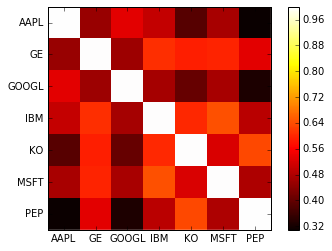

In [89]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

import seaborn as sns

In [92]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


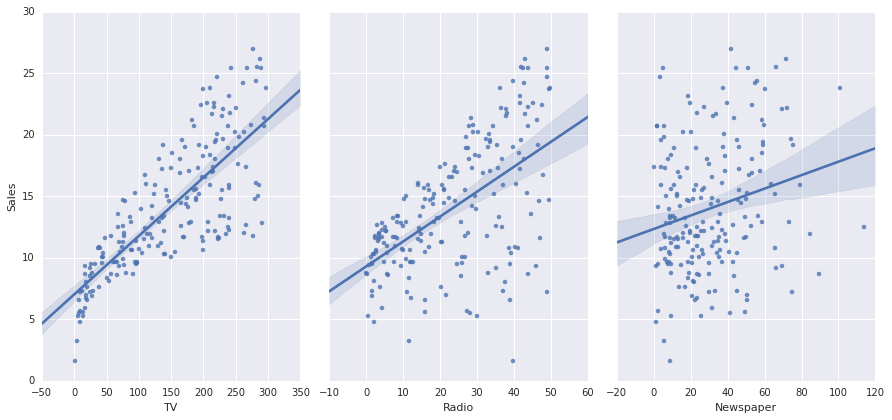

In [93]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=6, aspect=0.7, kind='reg')

In [105]:
url = 'data/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')

#For simplicity, we assume there are only two classes 
# (Use Logistic Regression Multi-class to classify for > 2 classes)
glass['assorted'] = glass.glass_type.map({1:0,2:0,3:0,4:0,5:1,6:1,7:1})

#For explanation, we use 'al' as the only feature.
glass.sort_values('al', inplace='True')
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0,0.16,1,0


In [106]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
logreg.fit(X,y)
assorted_pred_class = logreg.predict(X)
assorted_pred_prob = logreg.predict_proba(X)[:,1]

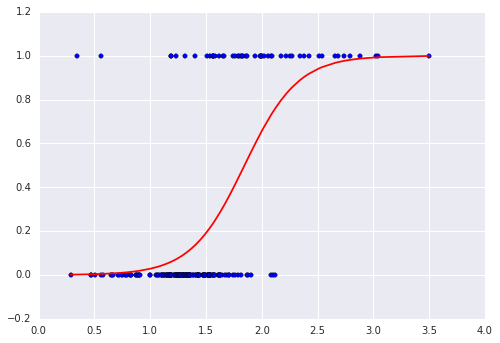

In [131]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color='red')

In [113]:
#create custom color map
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [117]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('data/iris.data', header=None, names=col_names)

#map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


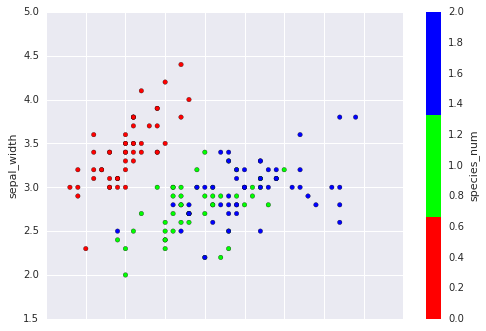

In [118]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width',c='species_num',colormap=cmap_bold)

In [128]:
#Store feature matrix in 'X'
from sklearn.cross_validation import train_test_split
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
y = iris.species_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

In [124]:
def v_accuracy(df_t, tknn):
    '''df_t: Test DataFrame. Has values and answers as well'''
    li_predict = tknn.predict(df_t[['sepal_length','sepal_width','petal_length','petal_width']].values)
    
    accuracy = np.mean(df_t.species_num == li_predict)
    return accuracy

In [141]:
accuracy_list = []
accuracy_index = range(1,30)

for k in range(1,30):
    v_knn = KNeighborsClassifier(n_neighbors=k)
    v_knn.fit(X_train,y_train)
    li_predict = v_knn.predict(X_test)
    accuracy_list.append(np.mean(li_predict == y_test))

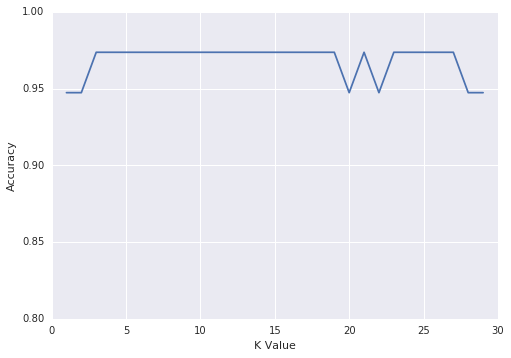

In [155]:
plt.plot(accuracy_index,accuracy_list)
plt.ylim([0.8,1])
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [158]:
url = './data/vehicles_train.csv'
train = pd.read_csv(url)
# encode car as 0 and truck as 1
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [159]:
train.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0


In [168]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)


# define X and y
feature_cols = ['year', 'miles', 'doors', 'vtype']
X = train[feature_cols]
y = train.price

In [169]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

3002.3809523809527

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [172]:
# create a GraphViz file
from sklearn.tree import export_graphviz
treereg.fit(X,y)
export_graphviz(treereg, out_file='tree_vehicles.dot', feature_names=feature_cols)

In [175]:
!dot -Tpng tree_vehicles.dot -o tree_vehicles.png